In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
C_m = 200.0  # Membrane capacitance
g_L = 10.0   # Leakage conductance
E_L = -70.0  # Leakage reversal potential
V_T = -50.0  # Threshold potential
Delta_T = 2.0  # Exponential rise characteristic parameter

V_reset = -65.0  # Reset potential
b = 60.0  # Increment of adaptation variable after each spike
a = 4.0   # Adaptation strength
tau_w = 144.0  # Adaptation time constant

T = 1000.0
dt = 0.1
time = np.arange(0, T + dt, dt)

I_ext = np.zeros_like(time)
I_ext[(time >= 100) & (time <= 300)] = 300.0

V = np.ones_like(time) * E_L  # Membrane potential
w = np.zeros_like(time)

for t in range(1, len(time)):

    dV = (g_L * (E_L - V[t-1]) + g_L * Delta_T * np.exp((V[t-1] - V_T) / Delta_T) - w[t-1] + I_ext[t-1]) * (dt / C_m)
    V[t] = V[t-1] + dV
    # Calculate membrane potential change

    dw = (a * (V[t-1] - E_L) - w[t-1]) * (dt / tau_w)
    w[t] = w[t-1] + dw
    # Calculate adaptation variable change

    if V[t] >= -40.0:
        V[t-1] = 20.0
        V[t] = V_reset
        w[t] += b

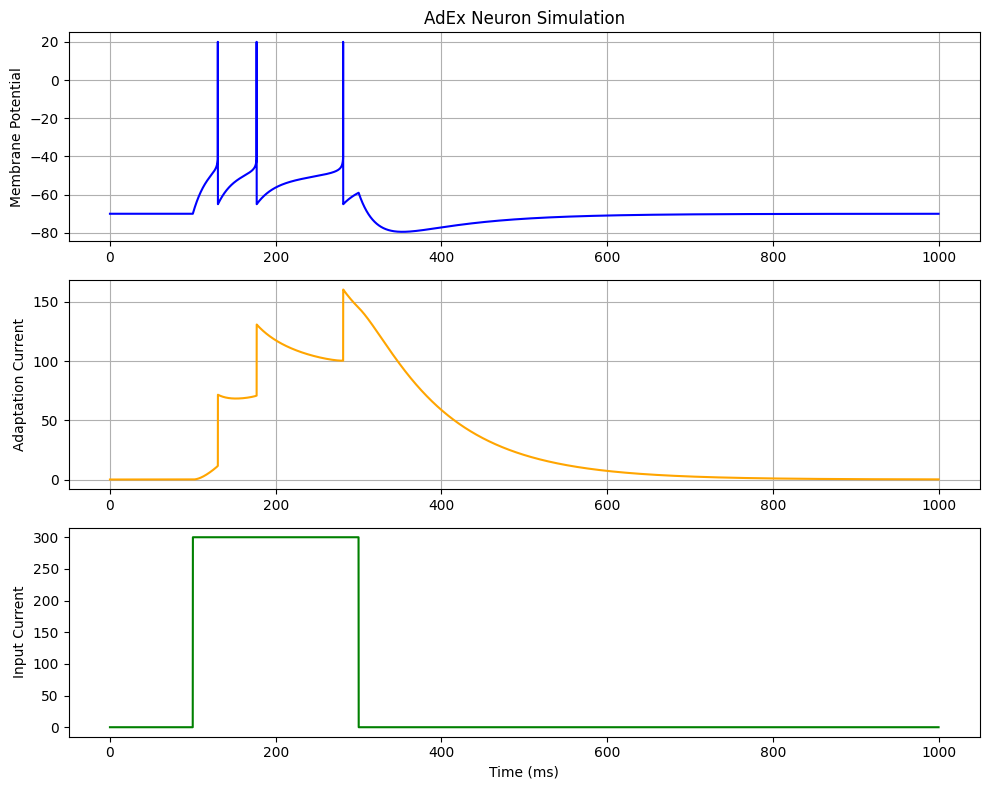

In [9]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(time, V, color='blue')
plt.title('AdEx Neuron Simulation')
plt.ylabel('Membrane Potential')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time, w, color='orange')
plt.ylabel('Adaptation Current')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time, I_ext, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Input Current')

plt.tight_layout()
plt.show()